<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/thermodynamics/solubility_of_gases_in_water.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Calculation of solubility of gases in water
#@markdown This notebook gives demonsitrations of soubility calculations in water
#@markdown <br><br>This document is part of the module ["Introduction to Gas Processing using NeqSim in Colab"](https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/examples_of_NeqSim_in_Colab.ipynb#scrollTo=_eRtkQnHpL70).
%%capture
!pip install --upgrade -q gspread
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

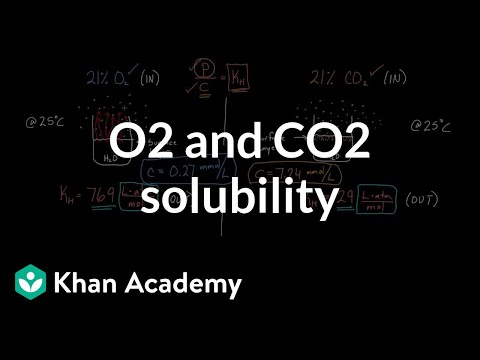

In [2]:
#@title Solubility of gases in water
#@markdown This video gives an intriduction to behavour of gases as function of pressure and temperature
from IPython.display import YouTubeVideo
YouTubeVideo('OCD4Dr3kmmA', width=600, height=400)

# Calcultion of solubility of gases in pure water

In the following example we calculate gas solubility in pure water as function of pressure and temperature

Text(0, 0.5, 'mole fraction [mol/kg water]')

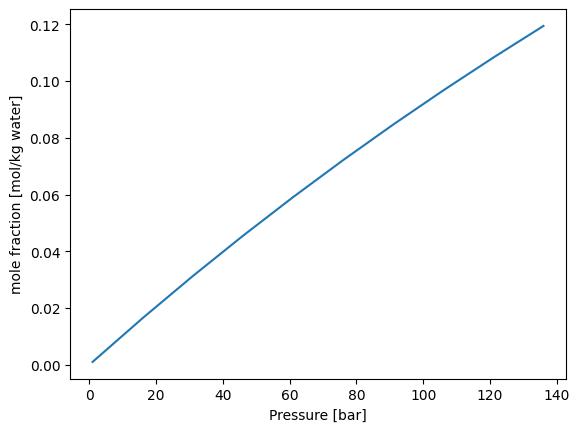

In [3]:
componentName = "oxygen" #@param ["methane", "ethane", "propane", "CO2", "nitrogen", "oxygen"]
temperature = 45.0   #@param {type:"number"}
minPressure = 1.0  #@param {type:"number"}
maxPressure = 150.0  #@param {type:"number"}
eosname = "cpa" #@param ["srk", "pr", "cpa"]
R = 8.314 # J/mol/K

# Creating a fluid in neqsim
fluid1 = fluid(eosname) #create a fluid using the SRK-EoS
fluid1.addComponent(componentName, 1.0) #adding 1 mole to the fluid
fluid1.addComponent("water", 1.0) #adding 1 mole to the fluid
fluid1.init(0);
fluid1.autoSelectMixingRule();

def gassol(pressure, temperature):
    fluid1.setPressure(pressure)
    fluid1.setTemperature(temperature+273.15)
    TPflash(fluid1)
    return fluid1.getPhase('aqueous').getComponent(componentName).getNumberOfMolesInPhase()/(fluid1.getPhase('aqueous').getComponent("water").getNumberOfMolesInPhase()*fluid1.getPhase('aqueous').getComponent("water").getMolarMass())

pressure = np.arange(minPressure, maxPressure, int((maxPressure-minPressure)/10.0)+1.0)
gassolubuility = [gassol(P,temperature) for P in pressure]

plt.plot(pressure, gassolubuility)
plt.xlabel('Pressure [bar]')
plt.ylabel('mole fraction [mol/kg water]')

Text(0, 0.5, 'gas solubility [mg / kg water]')

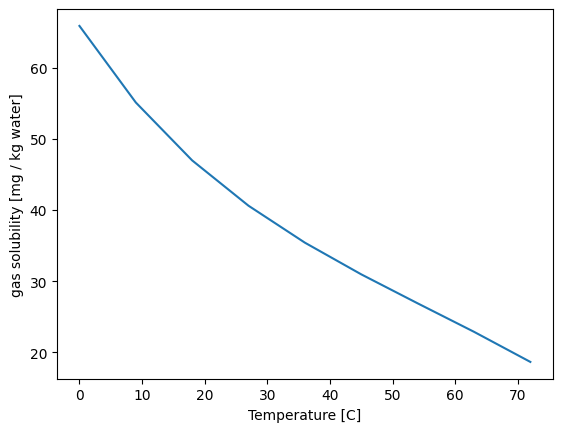

In [4]:
def gassol(pressure, temperature):
    fluid1.setPressure(pressure)
    fluid1.setTemperature(temperature+273.15)
    TPflash(fluid1)
    return fluid1.getComponent(componentName).getMolarMass()*fluid1.getPhase('aqueous').getComponent(componentName).getNumberOfMolesInPhase()/(fluid1.getPhase('aqueous').getComponent("water").getNumberOfMolesInPhase()*fluid1.getPhase('aqueous').getComponent("water").getMolarMass())*1e6

#fluid1.setMixingRule(2) # use classical mixing rule with one kij
#fluid1.getPhase(0).getMixingRule().setBinaryInteractionParameter(0,1,0.42)
#fluid1.getPhase(1).getMixingRule().setBinaryInteractionParameter(0,1,0.42)

minTemperature = 0.0   #@param {type:"number"}
maxTemperature = 80.0  #@param {type:"number"}
pressure = 1.01325  #@param {type:"number"}

temperature = np.arange(minTemperature, maxTemperature, int((maxTemperature-minTemperature)/10.0)+1.0)
gassolubuility = [gassol(pressure, T) for T in temperature]

plt.plot(temperature, gassolubuility)
plt.xlabel('Temperature [C]')
plt.ylabel('gas solubility [mg / kg water]')

In [5]:
printFrame(fluid1)

| 0                    | 1          | 2                    | 3                    | 4   | 5   | 6               |
|:---------------------|:-----------|:---------------------|:---------------------|:----|:----|:----------------|
|                      | total      | GAS                  | AQUEOUS              |     |     |                 |
| oxygen               | 5E-1       | 6.64594E-1           | 1.04946E-5           |     |     | [mole fraction] |
| water                | 5E-1       | 3.35406E-1           | 9.9999E-1            |     |     | [mole fraction] |
|                      |            |                      |                      |     |     |                 |
| Density              |            | 9.69751E-1           | 9.79406E2            |     |     | kg/m3           |
| Phase Fraction       |            | 7.52335E-1           | 2.47665E-1           |     |     | [mole fraction] |
| Molar Mass           | 2.5007E-2  | 2.73087E-2           | 1.80151E-2           |     

# Calcultion of solubility of gases in salt water

In the following example we calculate gas solubility in pure water as function of pressure and temperature. Sea water will contain salts in various amounts.

Text(0.5, 0, 'gas solubility [mol/kg water]')

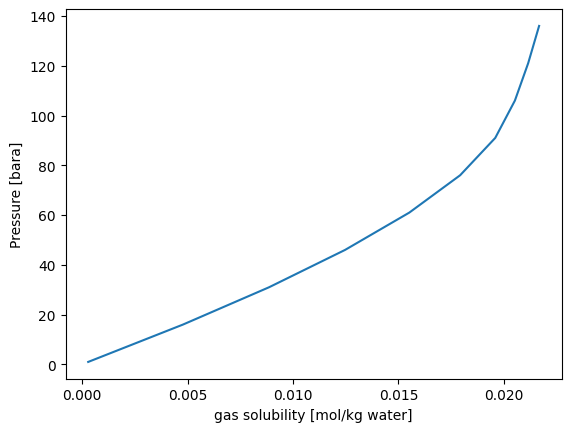

In [6]:
temperature = 45.0   #@param {type:"number"}
minPressure = 1.0  #@param {type:"number"}
maxPressure = 150.0  #@param {type:"number"}
componentName = "CO2" #@param ["methane", "ethane", "propane", "CO2", "nitrogen"]
ion1 = "Na+" #@param ["Na+", "Ca++"]
grperkgIon1 = 1.0 #@param {type:"number"}
ion2 = "Cl-" #@param ["Cl-", "CO3--"]
grperkgIon2 = 1.0 #@param {type:"number"}
eosname = "Electrolyte-CPA-EoS" #@param ["Electrolyte-CPA-EoS","Electrolyte-ScRK-EoS"]
R = 8.314 # J/mol/K

# Creating a fluid in neqsim
fluid1 = fluid(eosname) #create a fluid using the SRK-EoS
fluid1.addComponent(componentName, 1.0, 'kg/sec') #adding 100 mole to the fluid
fluid1.addComponent("water", 1.0, 'kg/sec') #adding 1 mole to the fluid
fluid1.addComponent(ion1, grperkgIon1/1000.0, 'kg/sec') #adding 1 mole to the fluiuidd
fluid1.addComponent(ion2, grperkgIon2/1000.0, 'kg/sec') #adding 1 mole to the fl
fluid1.autoSelectMixingRule();
#fluid1.setMultiPhaseCheck(True)

def gassol(pressure, temperature):
    fluid1.setPressure(pressure)
    fluid1.setTemperature(temperature+273.15)
    TPflash(fluid1)
    return fluid1.getPhase('aqueous').getComponent(componentName).getNumberOfMolesInPhase()/(fluid1.getPhase('aqueous').getComponent("water").getNumberOfMolesInPhase())

pressure = np.arange(minPressure, maxPressure, int((maxPressure-minPressure)/10.0)+1.0)
gassolubuility = [gassol(P,temperature) for P in pressure]

plt.plot(gassolubuility,pressure)
plt.ylabel('Pressure [bara]')
plt.xlabel('gas solubility [mol/kg water]')

# Calculation of Henrys Constant of gases in solvents


In [7]:
temperature = 25.0   #@param {type:"number"}
pressure = 1.0  #@param {type:"number"}

# Creating a fluid in neqsim
fluid1 = fluid("Electrolyte-CPA-EoS")
fluid1.addComponent("CO2", 11.0, "kg/sec")
fluid1.addComponent("MEG", 0.5, "kg/sec")
fluid1.addComponent("MDEA", 100.0, "kg/sec")

fluid1.setMixingRule(10)
fluid1.setMultiPhaseCheck(True)
fluid1.setTemperature(temperature, "C")
fluid1.setPressure(pressure, "bara")

TPflash(fluid1)

print("Henrys constant CO2 ", fluid1.getPhase("gas").getComponent("CO2").getx()*pressure/fluid1.getPhase("aqueous").getComponent("CO2").getx(), "bar")

printFrame(fluid1)

Henrys constant CO2  1111.5060566340107 bar
| 0                    | 1          | 2                           | 3                           | 4   | 5   | 6               |
|:---------------------|:-----------|:----------------------------|:----------------------------|:----|:----|:----------------|
|                      | total      | GAS                         | AQUEOUS                     |     |     |                 |
| CO2                  | 2.27804E-1 | 9.9999E-1                   | 8.99671E-4                  |     |     | [mole fraction] |
| MEG                  | 7.34202E-3 | 1.94167E-6                  | 9.49889E-3                  |     |     | [mole fraction] |
| MDEA                 | 7.64854E-1 | 8.14394E-6                  | 9.89601E-1                  |     |     | [mole fraction] |
|                      |            |                             |                             |     |     |                 |
| Density              |            | 1.7842E0              

# CO₂ in Brines: Thermodynamic Simulation Example

The following example demonstrates how to simulate the phase behavior and partitioning of CO₂ in brine (saline water) using the Soreide-Whitson model in neqsim. Such simulations are important for understanding CO₂ solubility, gas-water equilibrium, and the effect of salinity on CO₂ storage in subsurface reservoirs.

The Peng-Robinson equation of state (PR EOS) is widely used for predicting phase behavior, but its original form can underestimate the vapor pressure of water. To address this, Peng and Robinson introduced a modified alpha correction term to improve vapor pressure predictions. Building on this, Soreide and Whitson further refined the alpha term and introduced specific binary interaction parameters (kij) for CO₂, N₂, and H₂S, enabling more accurate solubility calculations in brines using the PR EOS.

**Key steps:**
- Define a brine system with CO₂, water, and other gases.
- Set salinity and flow rates.
- Perform a TP flash to determine phase equilibrium.
- Analyze mole fractions of CO₂ and water in both gas and aqueous phases.

This approach is relevant for carbon capture and storage (CCS), enhanced oil recovery (EOR), and subsurface gas injection studies.

**References:**
Whitson, C.H. & Brule, M.R. (2000). Phase Behavior. SPE Monograph Series, Vol. 20. (Experimental data and Soreide-Whitson model)

In [8]:
from neqsim import jneqsim
from neqsim.thermo import printFrame

In [9]:

# Create a Soreide-Whitson brine system (CO2, water, and other gases)
sys = jneqsim.thermo.system.SystemSoreideWhitson(298.0, 20.0)
sys.addComponent("nitrogen", 0.1, "mole/sec")
sys.addComponent("CO2", 0.2, "mole/sec")
sys.addComponent("methane", 0.3, "mole/sec")
sys.addComponent("ethane", 0.3, "mole/sec")
sys.addComponent("water", 0.1, "mole/sec")
sys.addSalinity(0.05, "mole/sec")  # Set salinity (e.g., 0.05 NaCl mole/sec)
sys.setTotalFlowRate(15, "mole/sec")
sys.setMixingRule(11)
sys.setPressure(40.0, "bara")
sys.setTemperature(45.0, "C")

# Perform TP flash to calculate phase equilibrium
ops = jneqsim.thermodynamicoperations.ThermodynamicOperations(sys)
ops.TPflash()

printFrame(sys)

| 0                    | 1          | 2                           | 3                           | 4   | 5   | 6               |
|:---------------------|:-----------|:----------------------------|:----------------------------|:----|:----|:----------------|
|                      | total      | GAS                         | AQUEOUS                     |     |     |                 |
| nitrogen             | 1E-1       | 1.10814E-1                  | 2.73869E-5                  |     |     | [mole fraction] |
| CO2                  | 2E-1       | 2.21454E-1                  | 1.66745E-3                  |     |     | [mole fraction] |
| methane              | 3E-1       | 3.32443E-1                  | 8.35545E-5                  |     |     | [mole fraction] |
| ethane               | 3E-1       | 3.32443E-1                  | 7.96401E-5                  |     |     | [mole fraction] |
| water                | 1E-1       | 2.84544E-3                  | 9.98142E-1                  |     | 

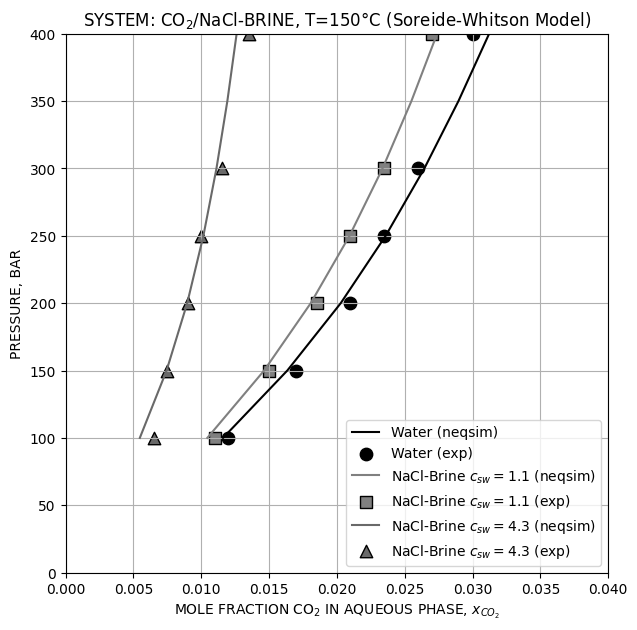

In [10]:
# Experimental data reference: Whitson & Brule (2000) SPE Monograph 20 (exp data)
from neqsim import jneqsim
import matplotlib.pyplot as plt
import numpy as np

# Define pressures and salinities to match the reference plot
pressures = np.array([100, 150, 200, 250, 300, 350, 400])  # bar
salinities = [0.0, 1.1, 4.3]  # NaCl molality (approximate, for water, brine 1.1, brine 4.3)
labels = ['Water', 'NaCl-Brine $c_{sw}=1.1$', 'NaCl-Brine $c_{sw}=4.3$']
colors = ['black', 'gray', 'dimgray']
markers = ['o', 's', '^']

T_C = 150.0
T_K = T_C + 273.15
x_CO2_calc = []

for i, salinity in enumerate(salinities):
    x_CO2 = []
    for P in pressures:
        sys = jneqsim.thermo.system.SystemSoreideWhitson(T_K, P)
        sys.addComponent('CO2', 1.0, 'mole/sec')
        sys.addComponent('water', 10.0, 'mole/sec')
        sys.addSalinity(0.0, "mole/sec")
        sys.setTotalFlowRate(11.0, 'mole/sec')
        sys.setMixingRule(11)
        sys.setPressure(P, 'bara')
        sys.setTemperature(T_K, 'K')
        ops = jneqsim.thermodynamicoperations.ThermodynamicOperations(sys)
        ops.TPflash()
        sys.addSalinity(salinity*sys.getPhase("aqueous").getFlowRate("kg/sec"), 'mole/sec')
        ops.TPflash()
        # Find CO2 mole fraction in aqueous phase (phase 1 is usually aqueous)
        phase_types = [sys.getPhase(p).getPhaseTypeName() for p in range(sys.getNumberOfPhases())]
        try:
            aq_idx = phase_types.index('AQUEOUS')
        except ValueError:
            aq_idx = 1 if len(phase_types) > 1 else 0
        x_CO2.append(sys.getPhase(aq_idx).getComponent(0).getx())
    x_CO2_calc.append(x_CO2)

# Experimental points from user
exp_points = {
    'NaCl-Brine $c_{sw}=4.3$': {
        'x': [0.0065, 0.0075, 0.009, 0.01, 0.0115, 0.0135],
        'p': [100, 150, 200, 250, 300, 400],
    },
    'Water': {
        'x': [0.012, 0.017, 0.021, 0.0235, 0.026, 0.03],
        'p': [100, 150, 200, 250, 300, 400],
    },
    'NaCl-Brine $c_{sw}=1.1$': {
        'x': [0.011, 0.015, 0.0185, 0.021, 0.0235, 0.027],
        'p': [100, 150, 200, 250, 300, 400],
    }
}

plt.figure(figsize=(7,7))
for i in range(len(salinities)):
    plt.plot(x_CO2_calc[i], pressures[:len(x_CO2_calc[i])], color=colors[i], label=labels[i]+' (neqsim)')
    # Experimental points: match marker and color to calculated line
    exp = exp_points[labels[i]]
    plt.scatter(exp['x'], exp['p'], color=colors[i], marker=markers[i], edgecolor='k', s=80, label=labels[i]+' (exp)')
plt.xlabel('MOLE FRACTION CO$_2$ IN AQUEOUS PHASE, $x_{CO_2}$')
plt.ylabel('PRESSURE, BAR')
plt.title('SYSTEM: CO$_2$/NaCl-BRINE, T=150°C (Soreide-Whitson Model)')
plt.xlim(0, 0.04)
plt.ylim(0, 400)
plt.xticks(np.arange(0, 0.045, 0.005))
plt.yticks(np.arange(0, 450, 50))
plt.legend()
plt.grid(True)
plt.show()


# Effect of salinity using the electrolyte CPA-EoS / electrolyte ScRK EoS of Solbraa (2002)
We repeat the example above, but now we will use the electrilyte CPA/ScRK EoS model. The models are described in the thesis of Solbraa (2002).

https://ntnuopen.ntnu.no/ntnu-xmlui/handle/11250/231326

| 0                    | 1          | 2                    | 3                    | 4   | 5   | 6               |
|:---------------------|:-----------|:---------------------|:---------------------|:----|:----|:----------------|
|                      | total      | GAS                  | AQUEOUS              |     |     |                 |
| CO2                  | 1.2485E-1  | 9.59633E-1           | 1.48105E-4           |     |     | [mole fraction] |
| water                | 7.6251E-1  | 4.03675E-2           | 8.70385E-1           |     |     | [mole fraction] |
| Na+                  | 5.63201E-2 | 6.47334E-42          | 6.47334E-2           |     |     | [mole fraction] |
| Cl-                  | 5.63201E-2 | 6.47334E-42          | 6.47334E-2           |     |     | [mole fraction] |
|                      |            |                      |                      |     |     |                 |
| Density              |            | 1.76541E0            | 1.01676E3            |     

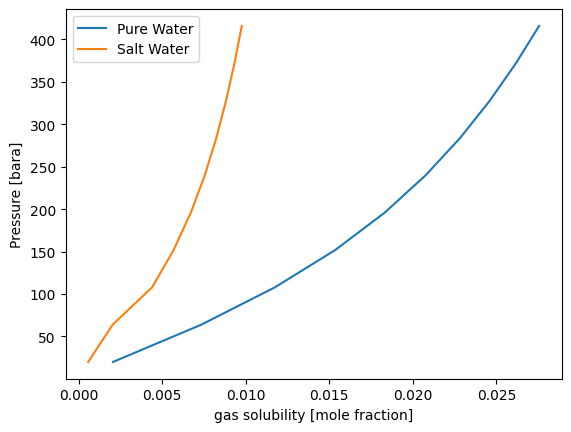

In [31]:
temperature = 150.0   #@param {type:"number"}
minPressure = 20  #@param {type:"number"}
maxPressure = 450.0  #@param {type:"number"}
componentName = "CO2" #@param ["methane", "ethane", "propane", "CO2", "nitrogen"]
ion1 = "Na+" #@param ["Na+", "Ca++"]
molesecIon1 = 4.1 #@param {type:"number"}
ion2 = "Cl-" #@param ["Cl-", "CO3--"]
molesecIon2 = 4.1 #@param {type:"number"}
eosname = "Electrolyte-ScRK-EoS" #@param ["Electrolyte-CPA-EoS","Electrolyte-ScRK-EoS"]
R = 8.314 # J/mol/K

# Creating a fluid in neqsim
fluid1 = fluid(eosname) #create a fluid using the SRK-EoS
fluid1.addComponent(componentName,0.4, 'kg/sec') #adding 100 mole to the fluid
fluid1.addComponent("water", 1.0, 'kg/sec') #adding 1 mole to the fluid
fluid1.autoSelectMixingRule();
fluid1.setMultiPhaseCheck(True)

def gassol(pressure, temperature):
    fluid1.setPressure(pressure)
    fluid1.setTemperature(temperature+273.15)
    TPflash(fluid1)
    return fluid1.getPhase('aqueous').getComponent(componentName).getx()

pressure = np.arange(minPressure, maxPressure, int((maxPressure-minPressure)/10.0)+1.0)
gassolubuility0 = [gassol(P,temperature) for P in pressure]

fluid1 = fluid(eosname)
fluid1.addComponent(componentName, 0.4, 'kg/sec')
fluid1.addComponent("water", 1.0, 'kg/sec')
fluid1.addComponent(ion1, molesecIon1, 'mole/sec')
fluid1.addComponent(ion2, molesecIon2, 'mole/sec')
fluid1.autoSelectMixingRule();
fluid1.init(0)
TPflash(fluid1)
printFrame(fluid1)

gassolubuility1 = [gassol(P,temperature) for P in pressure]

plt.plot(gassolubuility0,pressure, label='Pure Water')
plt.plot(gassolubuility1,pressure, label='Salt Water')
plt.ylabel('Pressure [bara]')
plt.xlabel('gas solubility [mole fraction]')
plt.legend()